In [1]:
# pip install tensorflow

In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


2025-11-05 05:50:53.998542: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-05 05:50:54.001592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-05 05:50:54.043619: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-05 05:50:54.044880: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-05 05:50:54.725537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [3]:
# Step 2: Load the dataset
data = pd.read_csv("Churn_Modelling.csv")  # same file name from Kaggle

# Display top rows
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check data shape and missing values
print(data.shape)
print(data.isnull().sum())
data.info()
data.describe()

(10000, 14)
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard       

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [58]:
# Step 3: Separate features (X) and target (y)
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Encode categorical columns ('Geography' and 'Gender')
X = pd.get_dummies(X, drop_first=True)

# Split dataset into train & test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (8000, 11)
Test data shape: (2000, 11)


In [59]:
X_train.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

In [42]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
# Step 4: Normalize (scale) numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
# Step 5: Build the neural network
model = Sequential()

# Input + first hidden layer
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(8, activation='relu'))

# Optional dropout (reduces overfitting)
model.add(Dropout(0.2))

# Output layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                192       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Step 6: Train (fit) the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
200/200 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8641 - val_loss: 0.3301 - val_accuracy: 0.8575
Epoch 2/30
200/200 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8623 - val_loss: 0.3325 - val_accuracy: 0.8569
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8658 - val_loss: 0.3342 - val_accuracy: 0.8569
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8623 - val_loss: 0.3362 - val_accuracy: 0.8569
Epoch 5/30
200/200 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8656 - val_loss: 0.3356 - val_accuracy: 0.8562
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8650 - val_loss: 0.3353 - val_accuracy: 0.8575
Epoch 7/30
200/200 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8623 - val_loss: 0.3369 - val_accuracy: 0.8587
Epoch 

63/63 [==============================] - 0s 2ms/step
Accuracy on Test Data: 85.75 %


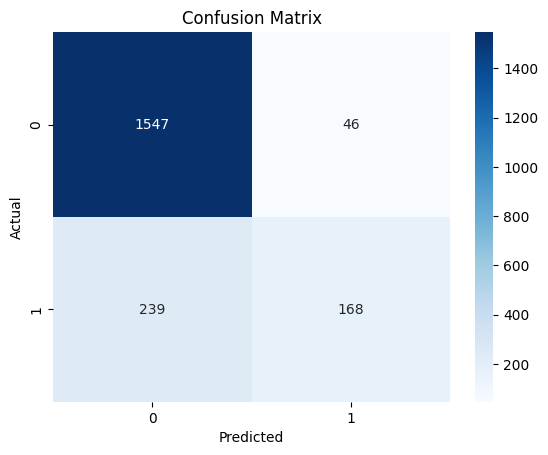

In [53]:
# Step 7: Evaluate on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", round(acc * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [54]:

print('Classification Report:\n',classification_report(y_test,
y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



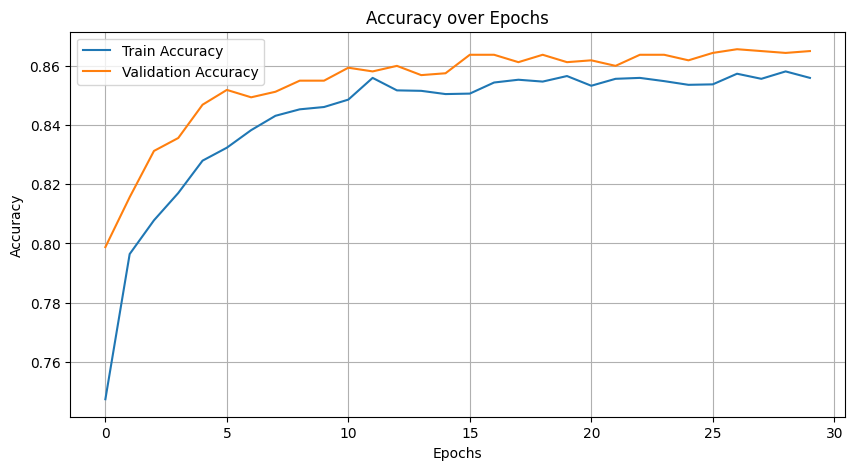

In [12]:
# Plot accuracy over epochs
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
